# Section 3.2 — Estimators

This notebook contains the code examples from [Section 3.1 Estimators]() of the **No Bullshit Guide to Statistics**.

We'll begin our study of inferential statistics by introducing **estimators**,
which are the math tools used for both **estimation**  and **hypothesis testing**.

![simplified_estimators.png](../stats_overview/figures/simplified_estimators.png)

#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

In [3]:
# set random seed for repeatability
np.random.seed(42)

In [4]:
from plot_helpers import plot_pdf

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$


## Statistical inference context

DATA:
- population
- sample
- statistic

PROB:
- probability model
- model family
- parameters


Statistical inference is the use the values of the statistics obtained from the sample $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ to estimate the population parameters $\theta$. For example,
the sample mean $\overline{\mathbf{x}}=\Mean(\mathbf{x})$ is an estimate of the population mean $\mu$,
and the sample variance $s_{\mathbf{x}}^2=\Var(\mathbf{x})$ is an estimate of the population variance $\sigma^2$.

## Estimator definitions

- We use the term "estimator" to describe a function $g$ that takes samples as inputs
  and produces parameter estimates as outputs.
  Written mathematically, and estimator is a function of the form:
  $$
   g \colon \underbrace{\mathcal{X}\times \mathcal{X}\times \cdots \times \mathcal{X}}_{n \textrm{ copies}}
   \quad \to \quad \mathbb{R},
  $$
  where $n$ is the samples size and $\mathcal{X}$ denotes the possible values of the random variable $X$.
- We give different names to estimates, depending on the use case:
  - **statistic** = a quantity computed from a sample (e.g. descriptive statistics)
  - **parameter estimates** = statistics that estimate population parameters
  - **test statistic** = an estimate used as part of hypothesis testing procedure
- The **value** of the estimator $g(\mathbf{x})$ is computed from a particular sample
  $\mathbf{x} = (x_1, x_2, \ldots, x_n)$.
- The **sampling distribution** of the estimator $g$ is the distribution of $g(\mathbf{X})$,
  where $\mathbf{X} = (X_1, X_2, \ldots, X_n)$ is a *random sample*.

### Example of estimators

Let's start with some estimators you're already familiar with (discussed in [descriptive statistics](./13_descriptive_statistics.ipynb)):

- **Sample mean**
  - estimator: $\overline{\mathbf{x}} = g(\mathbf{x}) = \frac{1}{n}\sum_{i=1}^n x_i$
  - gives an estimate for the population mean $\mu$


In [5]:
def mean(sample):
    return sum(sample) / len(sample)

# ALT. use np.mean(sample)
# ALT. use .mean() method on a Pandas series

- **Sample variance**
  - estimator: $s_{\mathbf{x}}^2 = h(\mathbf{x}) = \frac{1}{n-1}\sum_{i=1}^n (x_i-\overline{\mathbf{x}})^2$
  - gives an estimate for the population variance $\sigma^2$
  - note the denominator is $(n-1)$ and not $n$ 

In [6]:
def var(sample):
    xbar = mean(sample)
    sumdevs = sum( (xi-xbar)**2 for xi in sample )
    return sumdevs/(len(sample)-1)

# ALT. use np.var(sample, ddof=1)
# ALT. use .var() method on a Pandas series

In this notebook we'll develop some new estimators that are specific for the comparison of the two groups.

- **Difference between sample means**
  - estimator: $\hat{d} = \Mean(\mathbf{x}_A) - \Mean(\mathbf{x}_B) = \overline{\mathbf{x}}_A - \overline{\mathbf{x}}_B$
  - gives an estimate for the difference between population means: $\Delta =  \mu_A - \mu_B$

In [7]:
def dmeans(xA, xB):
    """
    Estimator for the difference between group means.
    """
    d = np.mean(xA) - np.mean(xB)
    return d

#### Discrete values

We'll also discuss estimators for working with samples of discrete values, based on counting:

- **Sample proportion**
  - estimator: $\widehat{p} = \RelFreq_{\mathbf{x}}(1) = \frac{ \textrm{count of } 1\textrm{s in } \mathbf{x} }{n} = g(\mathbf{x})$
  - gives an estimate of the parameter $p$ for a Bernoulli population
- **Difference between sample proportions**
  - estimator: $\hat{d} = \widehat{p}_{\mathbf{x}} - \widehat{p}_{\mathbf{y}} = d(\mathbf{x}, \mathbf{y})$
  - gives an estimate for the difference between population proportions $\delta = p_x - p_y$

## Estimator applications

alksj

## Sampling distributions


### Examples of sampling distributions

Let's look at the same estimators that we described in the previous section,
but this time applied to *random* samples of size $n$:

- Sample mean: $\overline{\mathbf{X}} = g(\mathbf{X}) = \tfrac{1}{n}\sum_{i=1}^n X_i$
- Sample variance: $S_{\mathbf{X}}^2 = h(\mathbf{X}) = \tfrac{1}{n-1}\sum_{i=1}^n \left(X_i - \overline{\mathbf{X}} \right)^2$
- Difference between sample means: $\hat{D} = d(\mathbf{X}, \mathbf{Y}) = \overline{\mathbf{X}} - \overline{\mathbf{Y}}$ 
- Sample proportion: $\widehat{P} = g(\mathbf{X}) = \frac{1}{n}\sum_{i=1}^n X_i$
- Difference between proportions: $\hat{D} = \widehat{P}_{\mathbf{X}} - \widehat{P}_{\mathbf{Y}} = d(\mathbf{X}, \mathbf{Y})$

Note these formulas is identical to the formulas we saw earlier.
The only difference is that we're calculating the functions $g$, $h$, and $d$ based on a random sample $\mathbf{X} = (X_1, X_2, \ldots, X_n)$,
instead of particular sample $\mathbf{x} = (x_1, x_2, \ldots, x_n)$.

### Estimator properties

- bias
- variance
- standard error



### Visualizing sampling distributions


In [8]:
def gen_sampling_dist(rv, statfunc, n, N=1000):
    stats = []
    for i in range(0, N):
        sample = rv.rvs(n)
        stat = statfunc(sample)
        stats.append(stat)
    return stats

## Bootstrap estimation

In [9]:
from statistics import mean

def bootstrap_stat(sample, statfunc=mean, B=5000):
    """
    Compute the sampling dist. of the `statfunc` estimator
    from `B` bootstrap samples generated from `sample`.
    """
    n = len(sample)
    bstats = []
    for i in range(0, B):
        bsample = np.random.choice(sample, n, replace=True)
        bstat = statfunc(bsample)
        bstats.append(bstat)
    return bstats


## Analytical derivations

### Sample mean estimator


### Sample variance estimator


### Difference between means estimator


##### OLD Difference between group means

Consider two normally distributed random variables $X_A$ and $X_B$:
$$ 
X_A \sim \mathcal{N}\!\left(\mu_A, \sigma_A \right)
\qquad
\textrm{and}
\qquad
X_B \sim \mathcal{N}\!\left(\mu_B, \sigma_B \right)
$$
that describe the probability distribution for groups A and B, respectively.

- A sample of size $n_A$ from $X_A$ is denoted $\mathbf{x}_A = (x_1, x_2, \ldots, x_{n_A})$=`xA`,
  and let $\mathbf{x}_B = (x_1, x_2, \ldots, x_{n_B})$=`xB` be a random sample of size $n_B$ from $X_B$.
- We compute the mean in each group: $\overline{\mathbf{x}}_{A} = \texttt{mean}(\mathbf{x}_A)$
  and $\overline{\mathbf{x}}_{B} = \texttt{mean}(\mathbf{x}_B)$
- The value of the estimator is $\hat{d} = \overline{\mathbf{x}}_{A} - \overline{\mathbf{x}}_{B}$

Note the difference between group means is precisely the estimator Amy need for her analysis (**Group S** and **Group NS**). We intentionally use the labels **A** and **B** to illustrate the general case.

#### Sampling distribution of the estimator `dmeans`

How well does the estimate $\hat{d}$ approximate the true value $\Delta$?
**What is the accuracy and variability of the estimates we can expect?**

To answer these questions, consider the random samples
$\mathbf{X}_A = (X_1, X_2, \ldots, X_{n_A})$
and $\mathbf{X}_B = (X_1, X_2, \ldots, X_{n_B})$,
then compute the **sampling distribution**: $\hat{D} = \overline{\mathbf{X}}_A - \overline{\mathbf{X}}_{B}$.

By definition, the sampling distribution of the estimator is obtained by repeatedly generating samples `xA` and `xB` from the two distributions and computing `dmeans` on the random samples. For example, we can obtain the sampling distribution by generating $N=1000$ samples.

#### Theoretical model for the sampling distribution of `dmeans`

Let's now use probability theory to build a theoretical model for the sampling distribution of the difference-between-means estimator `dmeans`.

- The central limit theorem tells us the sample mean within the two group are
  $$
  \overline{\mathbf{X}}_A \sim \mathcal{N}\!\left(\mu_A, \tfrac{\sigma_A}{\sqrt{n_A}} \right)
  \qquad \textrm{and} \qquad
  \overline{\mathbf{X}}_B \sim \mathcal{N}\!\left(\mu_B, \tfrac{\sigma_B}{\sqrt{n_B}} \right).
  $$

- The rules of probability theory tells us that the [difference of two normal random variables](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables#Independent_random_variables) requires subtracting their means and adding their variance, so we get:
  $$
  D \sim \mathcal{N}\!\left(\mu_A - \mu_B, \  \sqrt{\tfrac{\sigma^2_A}{n_A} + \tfrac{\sigma^2_B}{n_B}} \right).
  $$

In other words, the sampling distribution for the difference between means estimator $\hat{D}$ has mean and standard deviation given by:
$$ 
   \mu_D = \mu_A - \mu_B
   \qquad \textrm{and} \qquad
   \sigma_D = \sqrt{ \tfrac{\sigma^2_A}{n_A} + \tfrac{\sigma^2_B}{n_B}  }.
$$

Probability theory predicts the sampling distribution had mean ...

In [10]:
# Dmean = muA - muB
# Dmean

... and standard deviation:

In [11]:
# Dstd = np.sqrt(sigmaA**2/nA + sigmaB**2/nB)
# Dstd

Let's plot the theoretical sampling distribution 
on top of the simulated data to see if they are a good fit.

In [12]:
# x = np.linspace(min(dmeans_sdist), max(dmeans_sdist), 10000)
# D = norm(Dmean, Dstd).pdf(x)
# label = 'Theoretical sampling distribuition'
# sns.lineplot(x=x, y=D, ax=ax3, label=label, color=blue)
# ax3.figure

### Proportion estimator


In [13]:
visitors = pd.read_csv("../datasets/visitors.csv")
xA = visitors[visitors["version"]=="A"]["bought"].values
phat = xA.mean()
phat

0.046351084812623275

In [14]:
var = phat*(1-phat)
var

0.04420266174931628

In [15]:
n = len(xA)
se_Phat = np.sqrt(var/n)
se_Phat

0.006602451710468567

<AxesSubplot:xlabel='x', ylabel='$f_{X}$'>

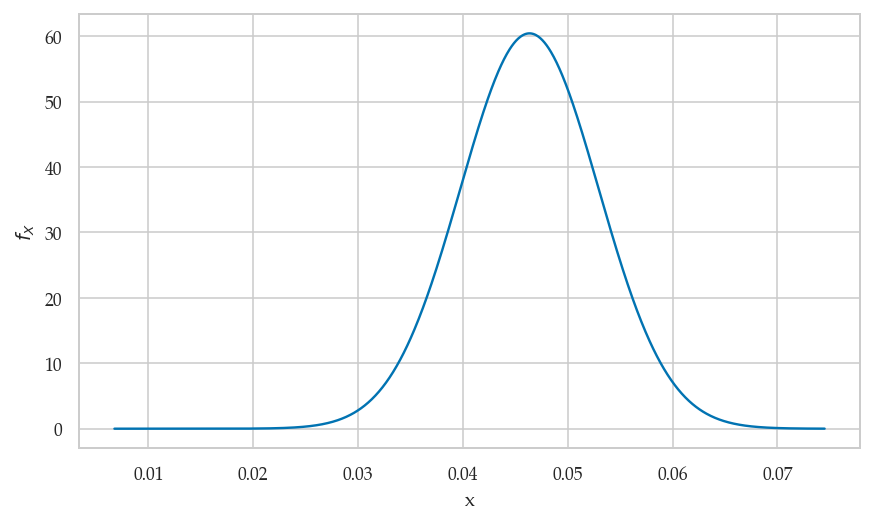

In [16]:
from scipy.stats import norm
Phat = norm(phat, se_Phat)
plot_pdf(Phat)

### Difference between proportion estimator

In [17]:
visitors = pd.read_csv("../datasets/visitors.csv")
xA = visitors[visitors["version"]=="A"]["bought"].values
xB = visitors[visitors["version"]=="B"]["bought"].values
pAhat = xA.mean()
pBhat = xB.mean()
pAhat, pBhat

(0.046351084812623275, 0.056795131845841784)

In [18]:
nA, nB = len(xA), len(xB)
nA, nB

(1014, 986)

In [19]:
d = pBhat - pAhat
d

0.01044404703321851

In [20]:
varA = pAhat*(1-pAhat)
varB = pBhat*(1-pBhat)
seD = np.sqrt(varA/nA + varB/nB)

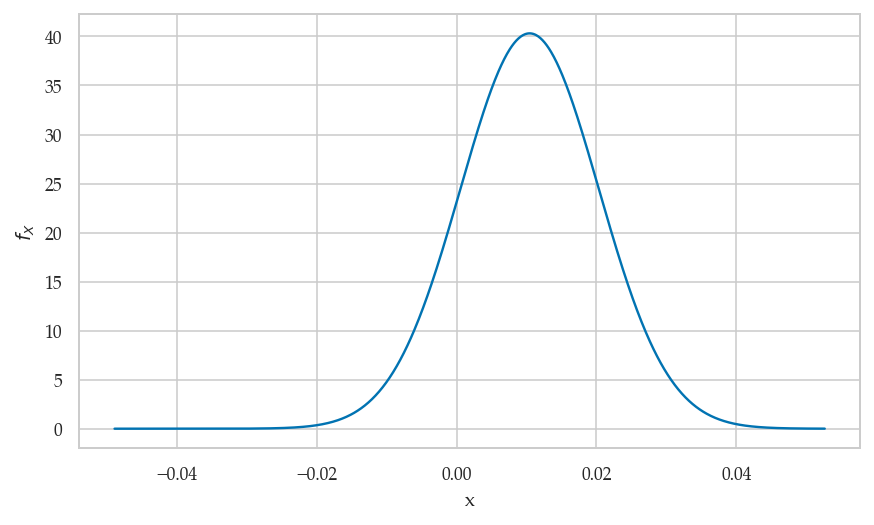

In [21]:
from scipy.stats import norm
Dhat = norm(d, seD)
ax = plot_pdf(Dhat)

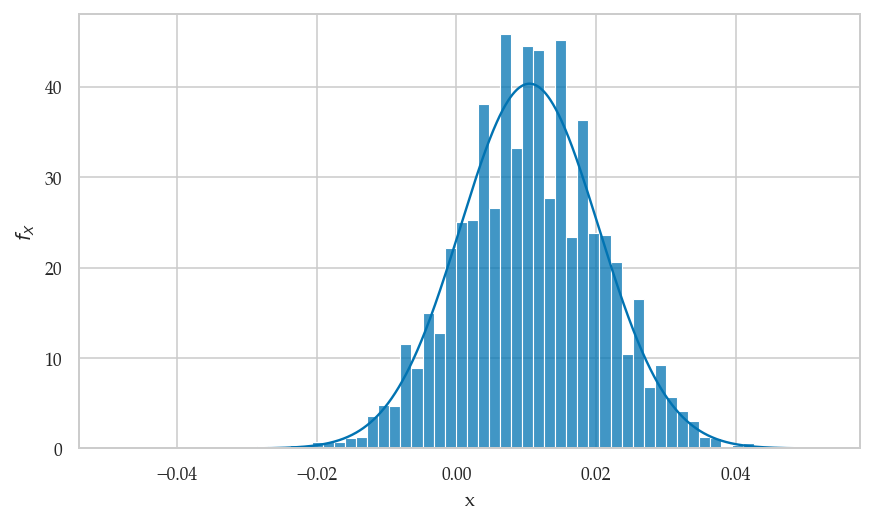

In [22]:
# compute bootstrap estimates for mean in each group
meanA_bstats = bootstrap_stat(xA, statfunc=np.mean)
meanB_bstats = bootstrap_stat(xB, statfunc=np.mean)

# compute the difference between means from bootstrap samples
dprops_bstats = []
for bmeanA, bmeanB in zip(meanA_bstats, meanB_bstats):
    d_boot = bmeanB - bmeanA
    dprops_bstats.append(d_boot)

sns.histplot(dprops_bstats, stat="density", ax=ax)
ax.figure

## Confidence intervals

### Bootstrap confidence intervals

### Analytical approximations

## Explanations

## Discussion

# CUT MATERIAL

## Example diff betweeen known Normals

In [23]:
# example parameters for each group
muA, sigmaA = 300, 10
muB, sigmaB = 200, 20

# size of samples for each group
nA = 5
nB = 4

#### Particular value of the estimator `dmeans`

In [24]:
xA = norm(muA, sigmaA).rvs(nA)  # random sample from Group A
xB = norm(muB, sigmaB).rvs(nB)  # random sample from Group B

d = dmeans(xA, xB)
d

117.48970206593862

The value of $\hat{d}$ computed from the samples is an estimate for the difference between means of two groups: $\Delta =  \mu_A - \mu_{B}$ (which we know is $100$ in this example).

In [25]:
# MAYBE USE IN EXERCISE
def gen_sampling_dist2(rvA, rvB, statfunc, nA, nB, N=1000):
    stats = []
    for i in range(0, N):
        xA = rvA.rvs(nA)
        xB = rvB.rvs(nB)
        stat = statfunc(xA, xB)
        stats.append(stat)
    return stats

In [26]:
def get_sampling_dist(statfunc, meanA, stdA, nA, meanB, stdB, nB, N=1000):
    """
    Obtain the sampling distribution of the statistic `statfunc`
    from `N` random samples drawn from groups A and B with parmeters:
      - Group A: `nA` values taken from `norm(meanA, stdA)`
      - Group B: `nB` values taken from `norm(meanB, stdB)`
    """
    stats = [] 
    for i in range(0, N):
        xA = norm(meanA, stdA).rvs(nA)  # random sample from Group A
        xB = norm(meanB, stdB).rvs(nB)  # random sample from Group B
        stat = statfunc(xA, xB)         # evaluate `statfunc`
        stats.append(stat)      # record the value of statfunc
    return stats

In [27]:
# Generate the sampling distirbution for dmeans
dmeans_sdist = get_sampling_dist(statfunc=dmeans,
                                 meanA=muA, stdA=sigmaA, nA=nA,
                                 meanB=muB, stdB=sigmaB, nB=nB)

print("Generated", len(dmeans_sdist), "values from `dmeans(XA, XB)`")

Generated 1000 values from `dmeans(XA, XB)`


In [28]:
# first 3 values
dmeans_sdist[0:3]

[87.8983846620313, 93.35915073139284, 104.48123797609409]

#### Plot the sampling distribution of `dmeans`

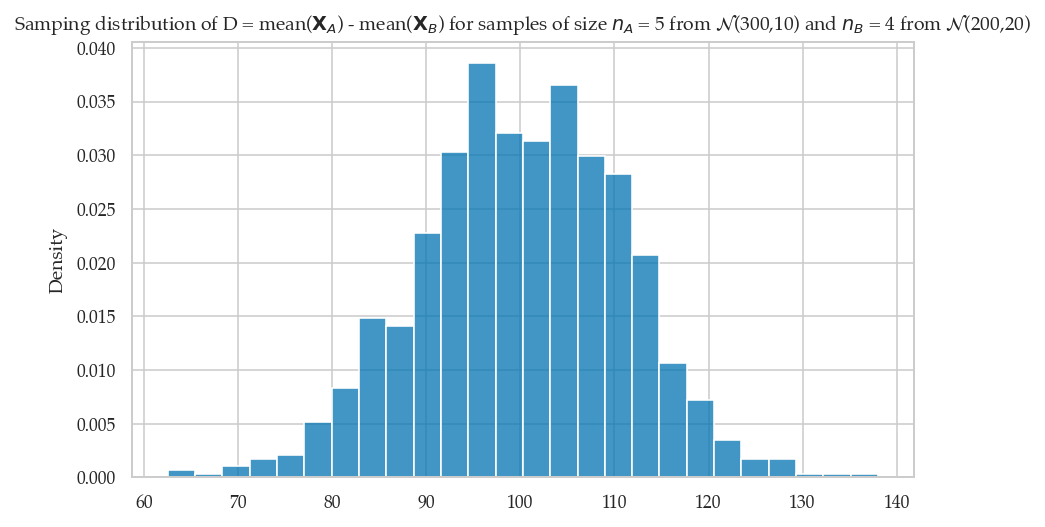

In [29]:
ax3 = sns.histplot(dmeans_sdist, stat="density")
title3 = "Samping distribution of D = mean($\mathbf{X}_A$) - mean($\mathbf{X}_B$) " + \
         "for samples of size $n_A$ = " + str(nA) + \
         " from $\mathcal{N}$(" + str(muA) + "," + str(sigmaA) + ")" + \
         " and $n_B$ = " + str(nB) + \
         " from $\mathcal{N}$(" + str(muB) + "," + str(sigmaB) + ")"
_ = ax3.set_title(title3)